# Hola Keyla! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen trabajo Keyla. Tu notebook está muy bien, con buen código, desarrollo correcto y ordenado. Antes de entrenar el modelo hay un par de revisiones y modificaciones a realizar, te las dejé indicadas. Por último, prueba con diferentes variantes del modelo de random forest.
    
Saludos!    

</div>

## Resumen de la revisión 2 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien hecho Keyla, las modificaciones realizadas están bien, lo único que falta es que remueves los outliers antes de pasar a la parte de los modelos. Con eso tu notebook estará listo.
    
Saludos!    

</div>

## Resumen de la revisión 3 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Muy bien Keyla, tu notebook está muy bien y completo, pero hay una celda que no compila, revisa mi comentario de esa parte.
    
Saludos!    

</div>

## Resumen de la revisión 4 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v4</b> <a class="tocSkip"></a>

Bien hecho Keyla, has completado correctamente todo lo necesario del notebook. No tengo comentarios de corrección adicionales, está aprobado.

Saludos!

</div>

----

# Preparación de datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
data_train.info()
print(data_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [4]:
data_test.info()
print(data_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [5]:
data_full.info()
print(data_full.shape)
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


### Porcentaje de datos en el conjunto de entrenamiento y prueba:

In [6]:
print('Porcentaje conjunto de entrenamiento:', round(len(data_train) * 100 / len(data_full), 2))
print('Porcentaje conjunto de prueba:', round(len(data_test) * 100 / len(data_full), 2))

Porcentaje conjunto de entrenamiento: 74.22
Porcentaje conjunto de prueba: 25.78


### Cálculo de recuperación:

$$ {Recuperación} = \frac{C \times (F - T)}{F \times (C - T)} \times 100\% $$ 

In [7]:
def recovery_calculation(data, stage= 'rougher'):
    if stage == 'rougher':
        C = data['rougher.output.concentrate_au']
        F = data['rougher.input.feed_au']
        T = data['rougher.output.tail_au']
    
    elif stage == 'final':
        C = data['final.output.concentrate_au']
        F = data['rougher.output.concentrate_au']
        T = data['final.output.tail_au']
        
    else: 
        print('Indicar etapa adecuada (rougher o final)')
        return np.nan
    numerador = C * (F - T)
    denominador = F * (C - T)
    recovery = 100 * (numerador / denominador)
    return recovery

In [8]:
rougher_data = data_train[['rougher.output.concentrate_au', 'rougher.input.feed_au',
                           'rougher.output.tail_au', 'rougher.output.recovery']].dropna()

rougher_recovery = recovery_calculation(rougher_data, 'rougher')

In [9]:
rougher_recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 14287, dtype: float64

In [10]:
mean_absolute_error(rougher_recovery, rougher_data['rougher.output.recovery'])

9.303415616264301e-15

Comentarios: 

Primeramente se calcula la recuperación del oro en un proceso de flotación en la minería mediante una función.
Por ultimo, el MAE es de 9.3 lo que indica que la función trabaja de manera adecuada y sus resultados son precisos. 

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>


Bien hecho. Muy bien al mostrar la fórmula y calcular el error

</div>

### Caracteristicas no disponibles en data_test

In [11]:
columns_full = data_full.columns.values
columns_test = data_test.columns.values

missed_columns = set(columns_full) - set(columns_test)
missed_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>


Correcto, bien con el uso de set

</div>

### Procesamiento de datos

In [12]:
data_train.duplicated().sum()
data_train.isna().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [13]:
data_train.isna().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [14]:
data_test = data_test.ffill()
data_train = data_train.ffill()

In [15]:
print(data_test.shape)
data_test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], 
                            how= 'left', on='date')
print(data_test.shape)

(5856, 53)
(5856, 55)


In [16]:
data_train = data_train[data_test.columns]

Comentarios: 

Se eliminaron datos duplicados y a los valores nulos del dataset de prueba se les asigno un valor similar con el metodo 'ffill' en base a la columna 'date'.
Al dataset de entrenamiento se le agregaron las columnas que le faltaban con el dataset de origen. 

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho, en esta data se puede aprovechar que la data está indexada por tiempo (es una serie de tiempo) y por lo tanto podemos imputar de forma simple los nulos con el valor siguiente
</div>

# Analisis de datos

### Concentración Au

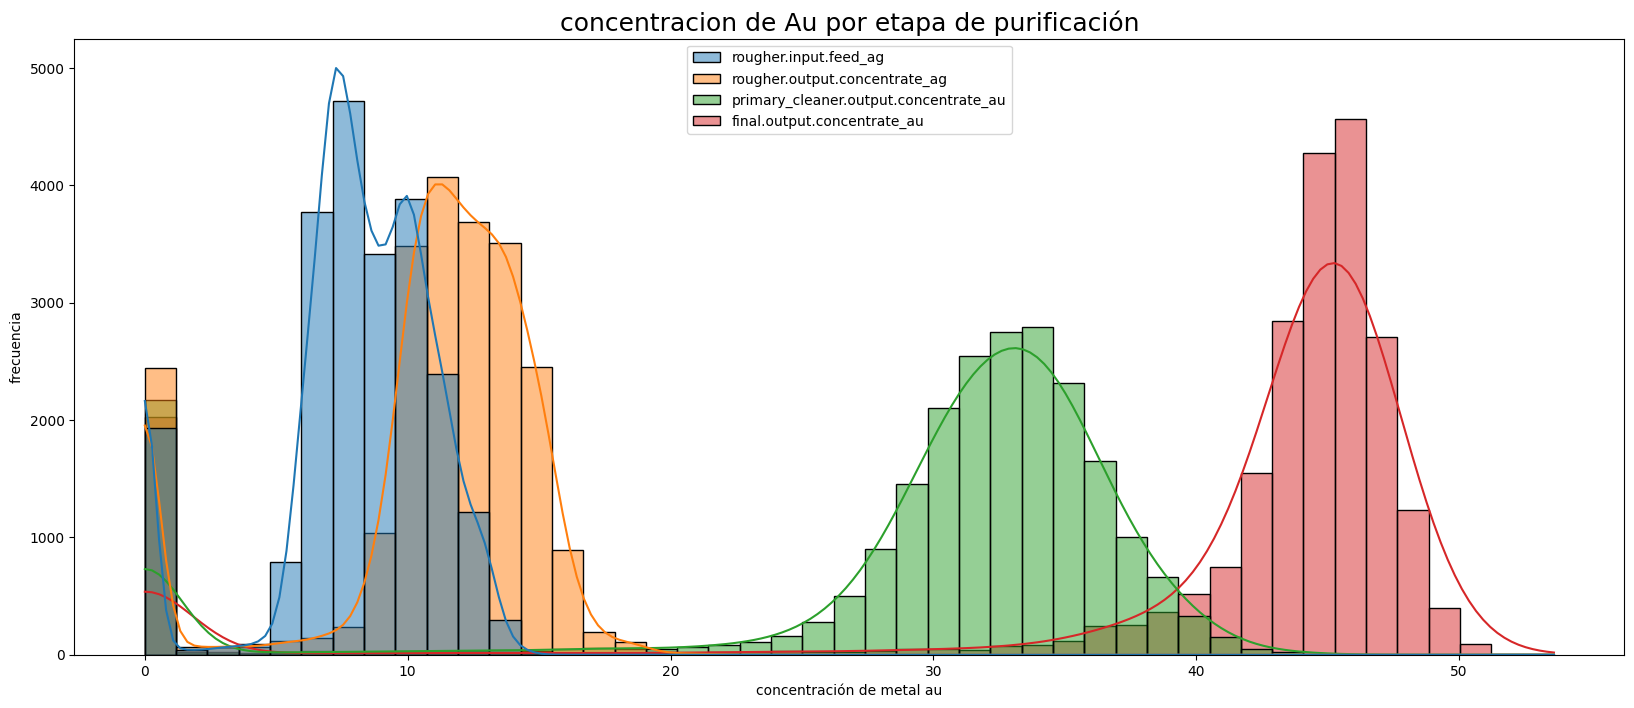

In [17]:
au_columns = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 
              'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']

concentrate_au = data_full[au_columns]

plt.figure(figsize = (20,8))
sns.histplot(concentrate_au, kde = True)
plt.xlabel('concentración de metal au')
plt.ylabel('frecuencia')
plt.title('concentracion de Au por etapa de purificación', fontsize = 18)
plt.show()


### Concentración Ag

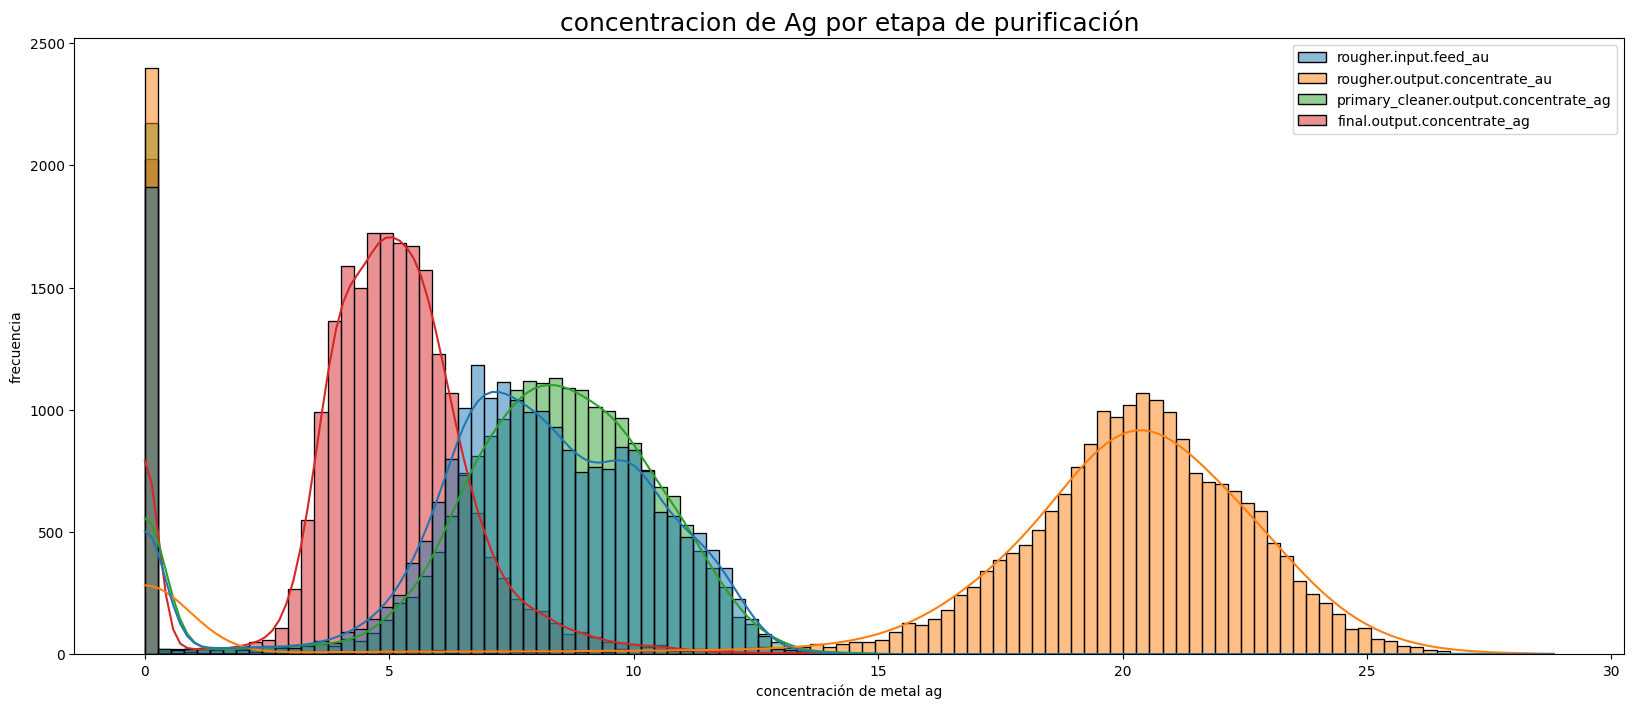

In [18]:
ag_columns = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 
              'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']

concentrate_ag = data_full[ag_columns]

plt.figure(figsize = (20,8))
sns.histplot(concentrate_ag, kde = True)
plt.xlabel('concentración de metal ag')
plt.ylabel('frecuencia')
plt.title('concentracion de Ag por etapa de purificación', fontsize = 18)
plt.show()

### Concentración Pb

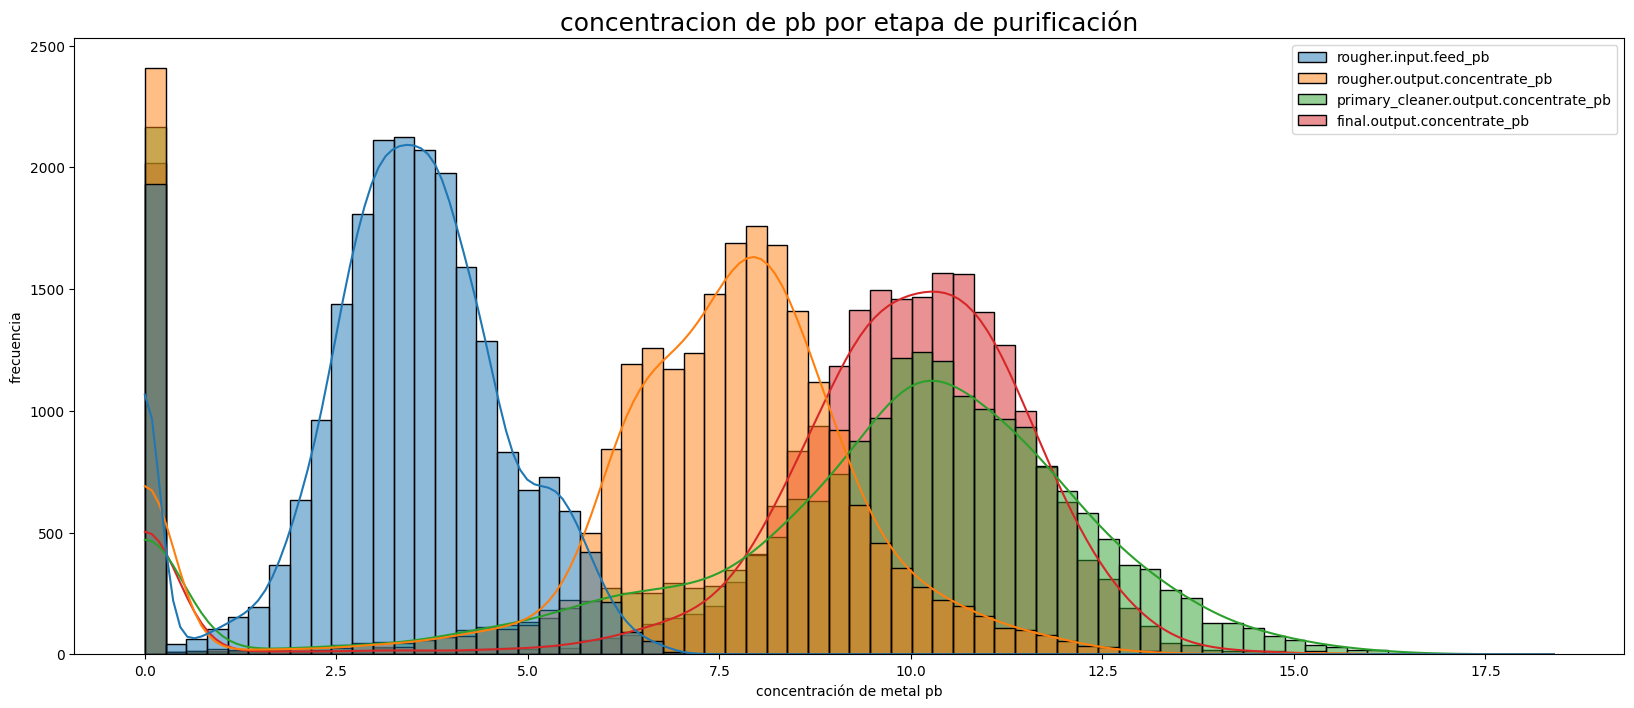

In [19]:
pb_columns = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 
              'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']

concentrate_pb = data_full[pb_columns]

plt.figure(figsize = (20,8))
sns.histplot(concentrate_pb, kde = True)
plt.xlabel('concentración de metal pb')
plt.ylabel('frecuencia')
plt.title('concentracion de pb por etapa de purificación', fontsize = 18)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Excelente, muy bien con los gráficos, son de gran calidad. Se aprecia como el oro aumenta notoriamente su concentración a medida que avanzan las etapas
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer </b> <a class="tocSkip"></a>

En esta parte compara el tamaño de las partículas de input entre el train y el test con un gráfico de densidad (kde) o histograma
</div>

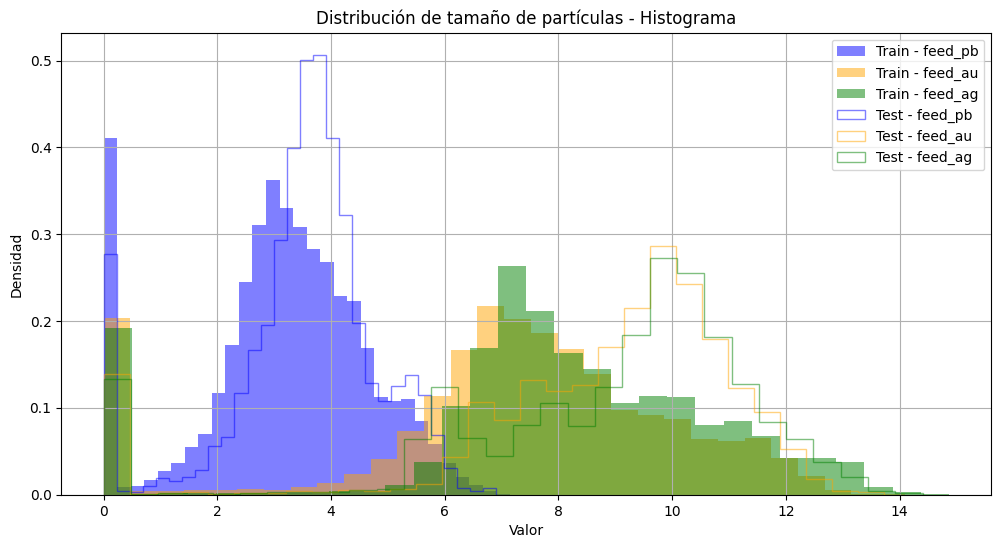

In [20]:
colors = {
    'rougher.input.feed_pb': 'blue',
    'rougher.input.feed_au': 'orange',
    'rougher.input.feed_ag': 'green'
}

plt.figure(figsize=(12, 6))


for col in ['rougher.input.feed_pb', 'rougher.input.feed_au', 'rougher.input.feed_ag']:
    plt.hist(data_train[col], bins=30, alpha=0.5, label=f'Train - {col.split(".")[-1]}', color=colors[col], density=True)


for col in ['rougher.input.feed_pb', 'rougher.input.feed_au', 'rougher.input.feed_ag']:
    plt.hist(data_test[col], bins=30, alpha=0.5, label=f'Test - {col.split(".")[-1]}', color=colors[col], density=True, histtype='step')

plt.title('Distribución de tamaño de partículas - Histograma')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Ok, la idea era hacerlo sobre el total (feed_size), pero está bien, es una buena comparación

</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer </b> <a class="tocSkip"></a>

Grafica un histograma para el total de la concentración de cada etapa (para de cada etapa rougher.input.feed_{}, rougher.output.concentrate_{} y final.output.concentrate_{}, suma au, ag, pb y sol, serán 3 gráficos, uno para cada etapa). En base a esto, verás de forma más clara donde hay outliers. Revisa cómo removerlos antes de pasar a la parte del modelo.
</div>

# Removiendo outliers

In [21]:
feed_cols = ['rougher.input.feed_au', 'rougher.input.feed_ag', 
             'rougher.input.feed_pb', 'rougher.input.feed_sol']

rougher_cols = ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 
                'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']

final_cols = ['final.output.concentrate_au', 'final.output.concentrate_ag', 
              'final.output.concentrate_pb', 'final.output.concentrate_sol']

# Sumamos la concentración total para cada etapa
feed_total = data_full[feed_cols].sum(axis=1)
rougher_total = data_full[rougher_cols].sum(axis=1)
final_total = data_full[final_cols].sum(axis=1)

In [22]:
def remove_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series >= lower) & (series <= upper)]

Text(0.5, 0, 'Suma de concentraciones')

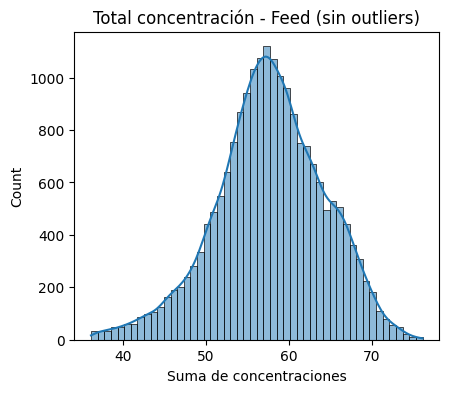

In [23]:
feed_total_clean = remove_outliers_iqr(feed_total)
rougher_total_clean = remove_outliers_iqr(rougher_total)
final_total_clean = remove_outliers_iqr(final_total)

# Graficamos
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.histplot(feed_total_clean, bins=50, kde=True)
plt.title('Total concentración - Feed (sin outliers)')
plt.xlabel('Suma de concentraciones')

Text(0.5, 0, 'Suma de concentraciones')

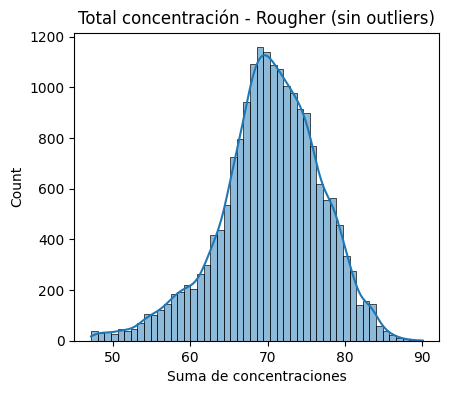

In [24]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 2)
sns.histplot(rougher_total_clean, bins=50, kde=True)
plt.title('Total concentración - Rougher (sin outliers)')
plt.xlabel('Suma de concentraciones')

Text(0.5, 0, 'Suma de concentraciones')

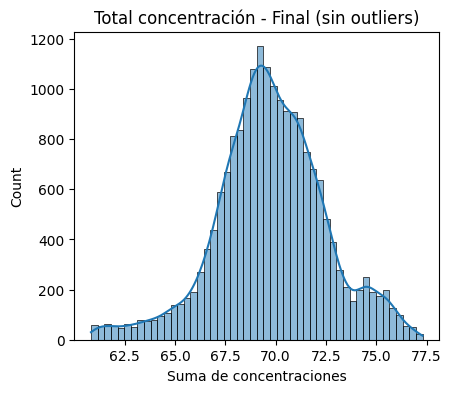

In [25]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 3)
sns.histplot(final_total_clean, bins=50, kde=True)
plt.title('Total concentración - Final (sin outliers)')
plt.xlabel('Suma de concentraciones')

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Muy bien, los gráficos son muy claros. 

</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Nota que hay muchos outliers cerca de cero. Remuévelos 

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Bien hecho!

</div>

# Removiendo outliers del conjunto de prueba

In [26]:
target = ['rougher.output.recovery', 'final.output.recovery']
y_train = data_train[target].reset_index(drop=True)
x_train = data_train.drop(target, axis=1)
x_train = x_train.drop(['date'], axis = 1)

y_train_clean = y_train.copy()
x_train_clean = x_train.copy()

# Limpiar outliers en y_train
for col in y_train.columns:
    y_train_clean[col] = remove_outliers_iqr(y_train[col])

# Limpiar outliers en x_train
for col in x_train.columns:
    x_train_clean[col] = remove_outliers_iqr(x_train[col])
    
data_clean = pd.concat([x_train_clean, y_train_clean], axis=1).dropna()

# Separate again after dropping NaNs
x_train_clean = data_clean.drop(target, axis=1)
y_train_clean = data_clean[target]

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

La celda no compila por un error en las columnas que contienen los dataframes. Revisa además si estás usando en los modelos la data que ya no tiene outliers.

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v4</b> <a class="tocSkip"></a>

Bien, corregido

</div>

In [27]:
def compute_smape(y, y_pred):
    n=len(y)
    real = abs(y)
    pred = abs(y_pred)
    diff = abs(y - y_pred)
    smape = (1/n)*sum(diff / ((real + pred) / 2)) * 100
    return smape

def smape_final(y, y_pred):
    y_rougher = y.iloc[:,0]
    y_pred_rougher = y_pred[:,0]
    
    y_final = y.iloc[:,1]
    y_pred_final = y_pred[:,1]
    
    smape_rougher = compute_smape(y_rougher, y_pred_rougher)
    smape_final = compute_smape(y_final, y_pred_final)
    
    return (0.25*smape_rougher + 0.75*smape_final)

smape_scorer = make_scorer(smape_final)

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correctas las funciones de score
</div>

In [28]:
lr_model = LinearRegression()

lr_score = cross_val_score(lr_model, x_train_clean, y_train_clean, scoring=smape_scorer, cv = 5)

lr_final_score = lr_score.mean()

In [29]:
print('Puntajes sMAPE para cada iteración:', lr_score)
print('Modelo de Regresion Lineal | sMAPE = {:.6f}'.format(lr_final_score))

Puntajes sMAPE para cada iteración: [10.57206251  6.25565542  5.94458797  8.11222296 13.49351274]
Modelo de Regresion Lineal | sMAPE = 8.875608


In [30]:
depths = [5, 10, 15, 20]
n_estimators_list = [50, 100, 200]

rf_results = {}

for depth in depths:
    for n in n_estimators_list:
        model = RandomForestRegressor(max_depth=depth, n_estimators=n, random_state=42)
        score = cross_val_score(model, x_train_clean, y_train_clean, scoring=smape_scorer, cv=5)
        avg_score = score.mean()
        rf_results[(depth, n)] = avg_score
        print(f"max_depth={depth}, n_estimators={n}, sMAPE = {avg_score:.6f}")


max_depth=5, n_estimators=50, sMAPE = 6.840189
max_depth=5, n_estimators=100, sMAPE = 6.849206
max_depth=5, n_estimators=200, sMAPE = 6.851871
max_depth=10, n_estimators=50, sMAPE = 6.833550
max_depth=10, n_estimators=100, sMAPE = 6.815469
max_depth=10, n_estimators=200, sMAPE = 6.797826
max_depth=15, n_estimators=50, sMAPE = 6.818252
max_depth=15, n_estimators=100, sMAPE = 6.819066
max_depth=15, n_estimators=200, sMAPE = 6.817391
max_depth=20, n_estimators=50, sMAPE = 6.872587
max_depth=20, n_estimators=100, sMAPE = 6.845325
max_depth=20, n_estimators=200, sMAPE = 6.808656


In [31]:
best_params = min(rf_results, key=rf_results.get)
best_score = rf_results[best_params]

print(f"\n Mejor combinación: max_depth={best_params[0]}, n_estimators={best_params[1]}")
print(f"sMAPE promedio: {best_score:.6f}")



 Mejor combinación: max_depth=10, n_estimators=200
sMAPE promedio: 6.797826


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien con el entrenamiento de los modelos, pero prueba más variantes del random forest, no uses tan solo los parámetros por defecto. Prueba con diferentes valores de depth o n_estimators
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Excelente, muy bien!

</div>

Comentarios:

El modelo de Random Forest con max_depth=10 y n_estimators=200 supera a la regresión lineal en precisión, con un SM
Esto indica que el comportamiento del proceso de recuperación de oro es más complejo y no lineal, por lo que un modelo como Random Forest, es el mas adecuado. 

Además, Random Forest mostró menor variabilidad entre iteraciones, lo que lo hace más consistente y confiable para este caso.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v4</b> <a class="tocSkip"></a>

Muy bien, bien hecho!

</div>